In [54]:
import pandas as pd
import neattext.functions as nfx
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
#!pip install neattext

In [4]:
data = pd.read_csv('/content/drive/MyDrive/data science/mini project/5.NLP/udemy_courses.csv')

In [5]:
data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [6]:
data.tail()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development
3677,297602,Using MODX CMS to Build Websites: A Beginner's...,https://www.udemy.com/using-modx-cms-to-build-...,True,45,901,36,20,Beginner Level,2.0,2014-09-28T19:51:11Z,Web Development


In [7]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [8]:
data.isnull().sum()

,0
course_id,0
course_title,0
url,0
is_paid,0
price,0
num_subscribers,0
num_reviews,0
num_lectures,0
level,0
content_duration,0


In [12]:
data.shape

(3672, 12)

In [9]:
data.duplicated().any()

True

In [10]:
data[data.duplicated()]

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
787,837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20,0,0,20,All Levels,0.616667,2016-05-16T18:28:30Z,Business Finance
788,1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,True,20,0,0,27,Beginner Level,1.500000,2017-04-23T16:19:01Z,Business Finance
894,1035638,Understanding Financial Statements,https://www.udemy.com/understanding-financial-...,True,25,0,0,10,All Levels,1.000000,2016-12-15T14:56:17Z,Business Finance
1100,1084454,CFA Level 2- Quantitative Methods,https://www.udemy.com/cfa-level-2-quantitative...,True,40,0,0,35,All Levels,5.500000,2017-07-02T14:29:35Z,Business Finance
1473,185526,MicroStation - Células,https://www.udemy.com/microstation-celulas/,True,20,0,0,9,Beginner Level,0.616667,2014-04-15T21:48:55Z,Graphic Design
2561,28295,Learn Web Designing & HTML5/CSS3 Essentials in...,https://www.udemy.com/build-beautiful-html5-we...,True,75,43285,525,24,All Levels,4.000000,2013-01-03T00:55:31Z,Web Development


In [11]:
data = data.drop_duplicates()

In [13]:
data['course_title']

,course_title
0,Ultimate Investment Banking Course
1,Complete GST Course & Certification - Grow You...
2,Financial Modeling for Business Analysts and C...
3,Beginner to Pro - Financial Analysis in Excel ...
4,How To Maximize Your Profits Trading Options
...,...
3673,Learn jQuery from Scratch - Master of JavaScri...
3674,How To Design A WordPress Website With No Codi...
3675,Learn and Build using Polymer
3676,CSS Animations: Create Amazing Effects on Your...


In [14]:
data.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

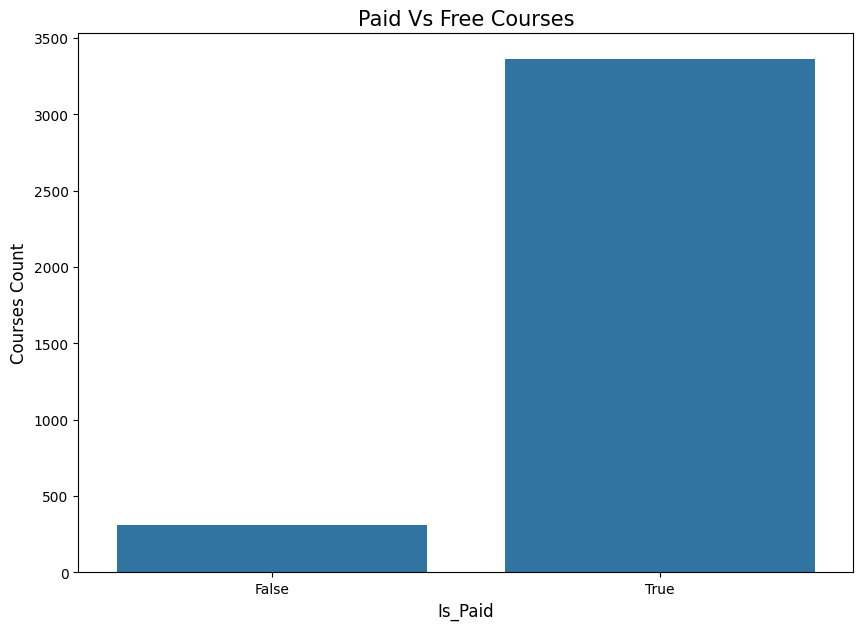

In [57]:
plt.figure(figsize=(10,7))
sns.countplot(x='is_paid',data=data)
plt.xlabel('Is_Paid',fontsize=12)
plt.ylabel('Courses Count',fontsize=12)
plt.title('Paid Vs Free Courses',fontsize=15)
plt.show()

#**Popularity-based recommendation system**

In [15]:
def popularity_based_recommendation(df,top_n=5):
    # Calculate popularity score for each course
    data['popularity_score'] = 0.6 * data['num_subscribers'] + 0.4 * data['num_reviews']

    # Sort courses by popularity score in descending order
    df_sorted = data.sort_values(by='popularity_score', ascending=False)

    # Return the recommended courses (course titles and popularity scores)
    recommended_courses = df_sorted[['course_title', 'popularity_score']].head(top_n)

    return recommended_courses

In [16]:
popularity_based_recommendation(data)

,course_title,popularity_score
2827,Learn HTML5 Programming From Scratch,164805.4
3032,Coding for Entrepreneurs Basic,96729.0
3230,The Web Developer Bootcamp,83928.4
3232,The Complete Web Developer Course 2.0,77672.0
2783,Build Your First Website in 1 Week with HTML5 ...,74544.2


#**Content-Based Recommendation System**

In [17]:
data['course_title'] = data['course_title'].apply(nfx.remove_stopwords)
data['course_title']  =data['course_title'].apply(nfx.remove_special_characters)

In [18]:
data.sample(5)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,popularity_score
2948,686764,Learn Plugin Development WordPress Building Pr...,https://www.udemy.com/learn-plugin-development...,True,60,1313,121,62,All Levels,11.0,2016-01-11T18:19:15Z,Web Development,836.2
1232,981684,Adobe InDesign CC Advanced,https://www.udemy.com/adobe-indesign-cc-advanced/,True,30,114,24,50,Expert Level,3.5,2016-10-18T17:09:56Z,Graphic Design,78.0
2519,736940,Practical CSS Website Development Crash Course,https://www.udemy.com/css-website-development-...,True,95,11170,35,19,All Levels,2.5,2016-02-02T21:05:27Z,Web Development,6716.0
2599,98140,Introduction Bootstrap 3,https://www.udemy.com/introduction-to-bootstra...,True,20,5795,79,29,Beginner Level,2.5,2013-09-27T03:11:22Z,Web Development,3508.6
343,323196,Master Finance Hours,https://www.udemy.com/basic-finance-for-startu...,True,20,721,12,29,Beginner Level,3.0,2014-10-28T20:48:49Z,Business Finance,437.4


In [19]:
data['title_subject']  =data['course_title'] +' '+data['subject']

In [20]:
cv = CountVectorizer(max_features=3000)
vectors = cv.fit_transform(data['title_subject']).toarray()

In [21]:
vectors[0]

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
len(cv.get_feature_names_out())

3000

In [26]:
cv.get_feature_names_out()

array(['000005', '001', '01', ..., 'zoho', 'zombie', 'zu'], dtype=object)

In [27]:
from sklearn.metrics.pairwise import cosine_similarity

In [28]:
similarity = cosine_similarity(vectors)

In [29]:
sorted(list(enumerate(similarity[0])),reverse=True,key=lambda x:x[1])[1:6]

[(39, 0.7715167498104596),
 (240, 0.6666666666666669),
 (417, 0.6666666666666669),
 (418, 0.6172133998483676),
 (657, 0.6172133998483676)]

In [30]:
def recommend(course):
    # let's featch the index
    course_index = data[data['course_title']==course].index[0]
    distances = similarity[course_index]
    courses_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:6]
    for i in courses_list:
        print(data.iloc[i[0]]['course_title'])

#**Recommendation**

In [50]:
recommend("know HTML Learn HTML Basics")

['WordPress Development Beginners',
 'Wordpress Theme Development Beginners',
 'Wordpress beginners Build Websites Fast Coding',
 'Website Coding WordPress  Web Skills',
 'Kids Coding  Beginners CSS']

In [51]:
course_index = data[data['course_title'] == 'Wordpress beginners Build Websites Fast Coding'].index[0]

In [52]:
course_index

3538